In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime
import glob
import matplotlib.patches as mpatches



In [2]:
#this assumes only 1 ina file and 1 selenium file in directory!!!
testDirectoryName = "systemSensitivityIdleTest_Aug25/" #must end with a /
testDirectoryPath = "C:/Users/Alex Nathanson/Documents/solarserver/aggregator/" + testDirectoryName
fileList = glob.glob(testDirectoryPath  + "*.csv")

print(testDirectoryPath)
fileList

C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25/


['C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25\\ina219-2019-08-26-1566788466.csv',
 'C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25\\selenium-sensitivity-2019-08-25-1566788466.csv']

In [3]:
inaFileName = [k for k in fileList if 'ina' in k]

inaFileName[0]

'C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25\\ina219-2019-08-26-1566788466.csv'

In [4]:
selFileName = [k for k in fileList if 'selenium' in k]

selFileName[0]

'C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25\\selenium-sensitivity-2019-08-25-1566788466.csv'

In [5]:
#For CSV files
inaData = pd.read_csv(inaFileName[0]).fillna(0)

In [6]:
print(inaData.shape)
inaData.head()

(7002, 3)


,mA,V,time
0,510.1,4.54,1.566788e+09
1,508.4,4.54,1.566788e+09
2,507.4,4.54,1.566788e+09
3,507.8,4.54,1.566788e+09
4,510.0,4.54,1.566788e+09


In [7]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [8]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [9]:
inaData.head()

,mA,V,watts,time
0,510.1,4.54,2.315854,1.566788e+09
1,508.4,4.54,2.308136,1.566788e+09
2,507.4,4.54,2.303596,1.566788e+09
3,507.8,4.54,2.305412,1.566788e+09
4,510.0,4.54,2.315400,1.566788e+09


In [10]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.223557028665782

In [11]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [12]:
print averagedINA.shape
averagedINA.head()

(459, 4)


,mA,V,watts,time
0,509.493333,4.54,2.313100,1.566788e+09
1,509.773333,4.54,2.314371,1.566788e+09
2,509.393333,4.54,2.312646,1.566788e+09
3,509.193333,4.54,2.311738,1.566788e+09
4,509.880000,4.54,2.314855,1.566788e+09


In [13]:
seleniumData = pd.read_csv(selFileName[0]).fillna(0)


In [14]:
print(seleniumData.shape)
seleniumData.head()

(11, 2)


,task,time
0,start idle,1.566789e+09
1,stop idle,1.566789e+09
2,start single load,1.566789e+09
3,load,1.566789e+09
4,stop single load,1.566789e+09


In [15]:
seleniumData.task.loc[0]

'start idle'

In [16]:
# get start and stop times

testTimes = []

currentRound = 0
for getT in list(range(seleniumData.shape[0])):
    
    if 'start' in seleniumData.task.loc[getT]:
        roundTimes = [seleniumData.time.loc[getT]]
    elif 'stop' in seleniumData.task.loc[getT]:
        roundTimes.append(seleniumData.time.loc[getT])
        testTimes.append(roundTimes)
        
testTimes

[[1566788526.408, 1566788557.186],
 [1566788617.187, 1566788647.581],
 [1566788707.5839999, 1566788739.105],
 [1566788799.106, 1566788829.5270002]]

In [17]:
#make new data frames with power date from only test durations

dataFrameSplits = []

for splitTests in list(range(len(testTimes))):
    dataFrameSplits.append(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])


print(len(dataFrameSplits))

#dataFrameSplits[2]

4


In [18]:
#get the max and mins for each test set

for mX in list(range(len(dataFrameSplits))):
    print('------'+str(mX)+'------')
    print ('Max:')
    print np.max(dataFrameSplits[mX].watts)
    print ('Min:')
    print np.min(dataFrameSplits[mX].watts)

------0------
Max:
2.3120706666666666
Min:
2.307379333333333
------1------
Max:
2.3183661333333334
Min:
2.3059870666666664
------2------
Max:
2.4960314666666665
Min:
2.306350266666667
------3------
Max:
2.3211204
Min:
2.3043526666666665


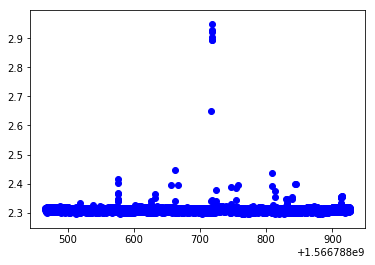

In [19]:

#graph all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


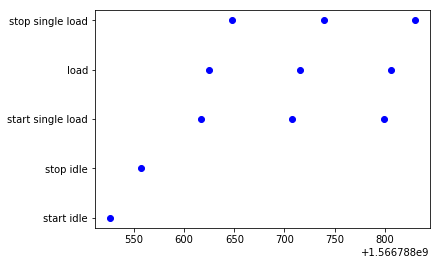

In [20]:
# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25/voltage_2019-08-25-1566789345.png


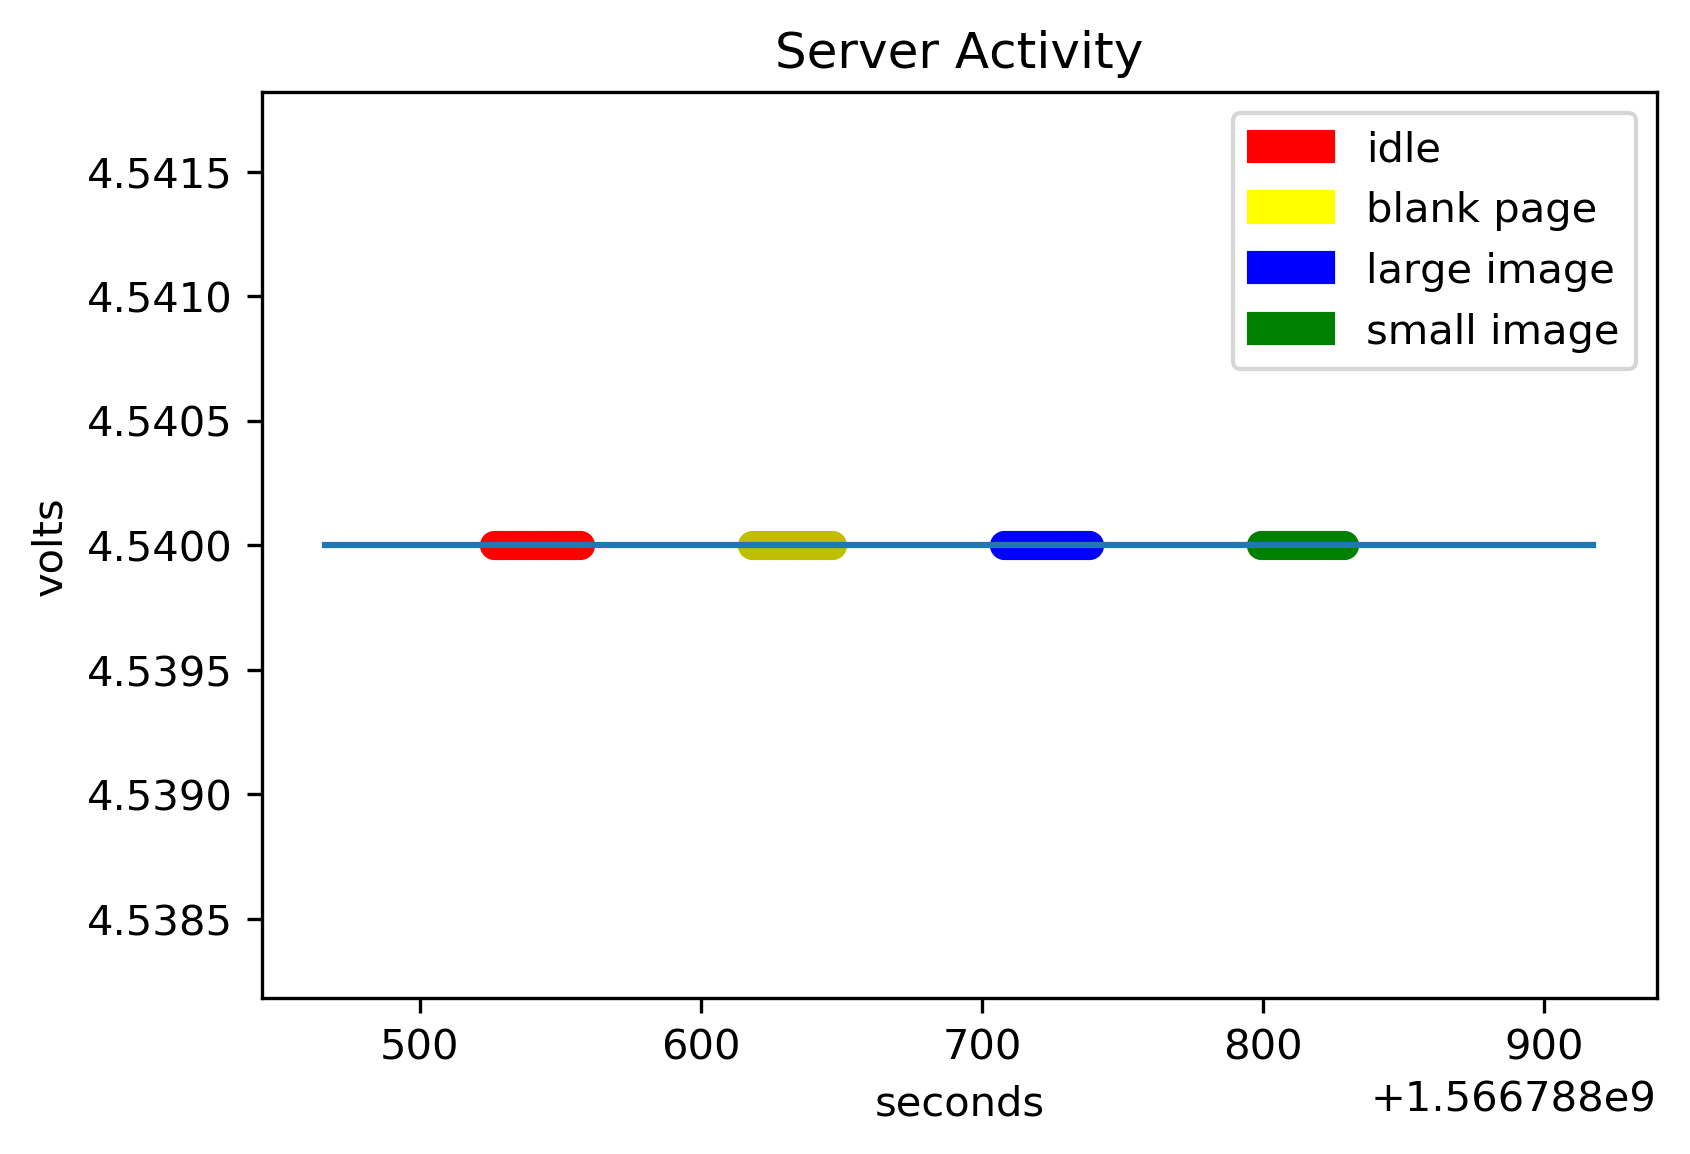

In [23]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'V']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='volts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'V'], color=colors[plotNum%4])

redLabel = mpatches.Patch(color='red', label='idle')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='blank page')
greenLabel = mpatches.Patch(color='green', label='small image')


plt.legend(handles=[redLabel, yellowLabel, blueLabel, greenLabel])

#ax.grid()
pngName1 = testDirectoryPath +"voltage_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25/current_2019-08-25-1566789377.png


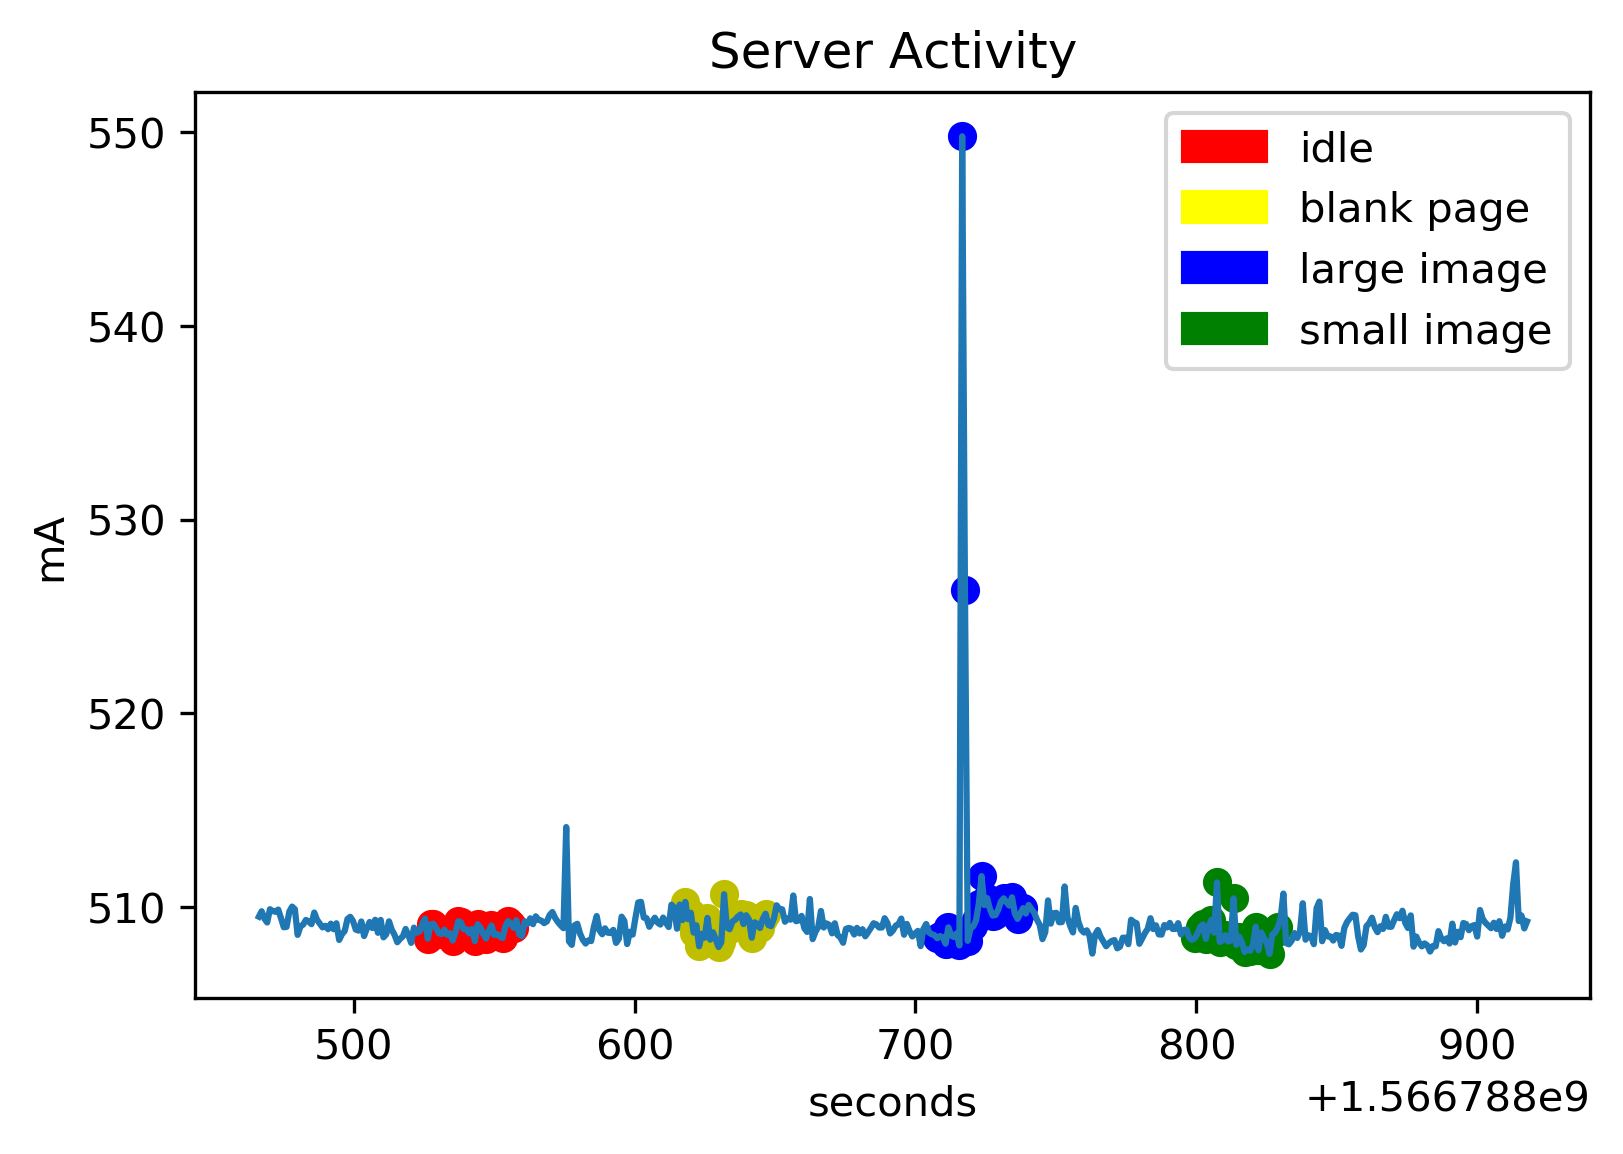

In [24]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'mA']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='mA',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'mA'], color=colors[plotNum%4])

redLabel = mpatches.Patch(color='red', label='idle')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='blank page')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel, blueLabel, greenLabel])

#ax.grid()
pngName1 = testDirectoryPath +"current_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25/watts_2019-08-25-1566789419.png


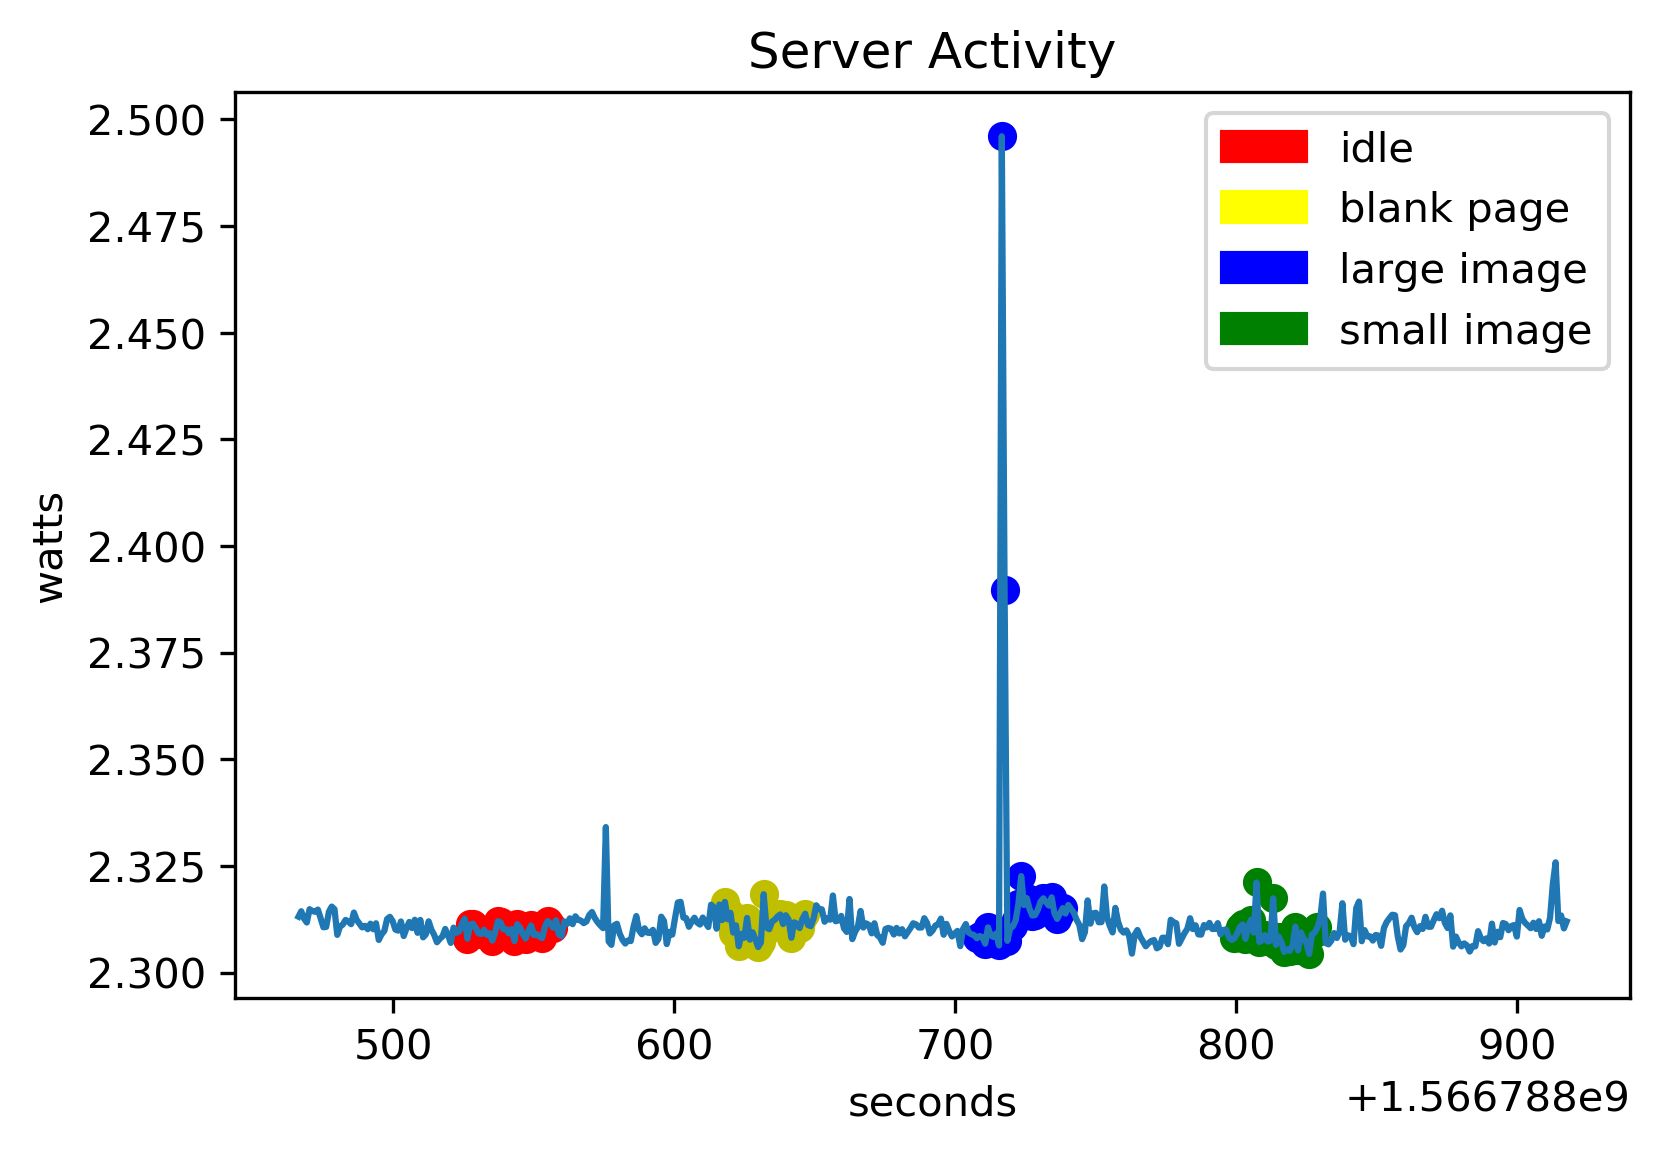

In [25]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='watts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'watts'], color=colors[plotNum%4])

redLabel = mpatches.Patch(color='red', label='idle')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='blank page')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel, blueLabel, greenLabel])

#ax.grid()
pngName1 = testDirectoryPath +"watts_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

In [26]:
overlayData = dataFrameSplits
overlayData[2]

,mA,V,watts,time
245,508.380000,4.54,2.308045,1.566789e+09
246,508.493333,4.54,2.308560,1.566789e+09
247,508.433333,4.54,2.308287,1.566789e+09
248,508.100000,4.54,2.306774,1.566789e+09
249,508.940000,4.54,2.310588,1.566789e+09
250,508.526667,4.54,2.308711,1.566789e+09
251,508.446667,4.54,2.308348,1.566789e+09
252,508.633333,4.54,2.309195,1.566789e+09
253,508.006667,4.54,2.306350,1.566789e+09
254,549.786667,4.54,2.496031,1.566789e+09


In [27]:
list(range(len(dataFrameSplits)))

[0, 1, 2, 3]

In [28]:
overlayData[0]

,mA,V,watts,time
61,508.360000,4.54,2.307954,1.566789e+09
62,509.093333,4.54,2.311284,1.566789e+09
63,509.133333,4.54,2.311465,1.566789e+09
64,508.906667,4.54,2.310436,1.566789e+09
65,508.640000,4.54,2.309226,1.566789e+09
66,508.593333,4.54,2.309014,1.566789e+09
67,508.820000,4.54,2.310043,1.566789e+09
68,508.560000,4.54,2.308862,1.566789e+09
69,508.640000,4.54,2.309226,1.566789e+09
70,508.260000,4.54,2.307500,1.566789e+09


In [29]:
for overlays in list(range(len(dataFrameSplits))):
    overlayData[overlays].insert(4, 'scaled', overlayData[overlays].time - overlayData[overlays].time[overlayData[overlays].time.index[0]], True)


C:/Users/Alex Nathanson/Documents/solarserver/aggregator/systemSensitivityIdleTest_Aug25/aggregator_overlay-2019-08-25-1566789453.png


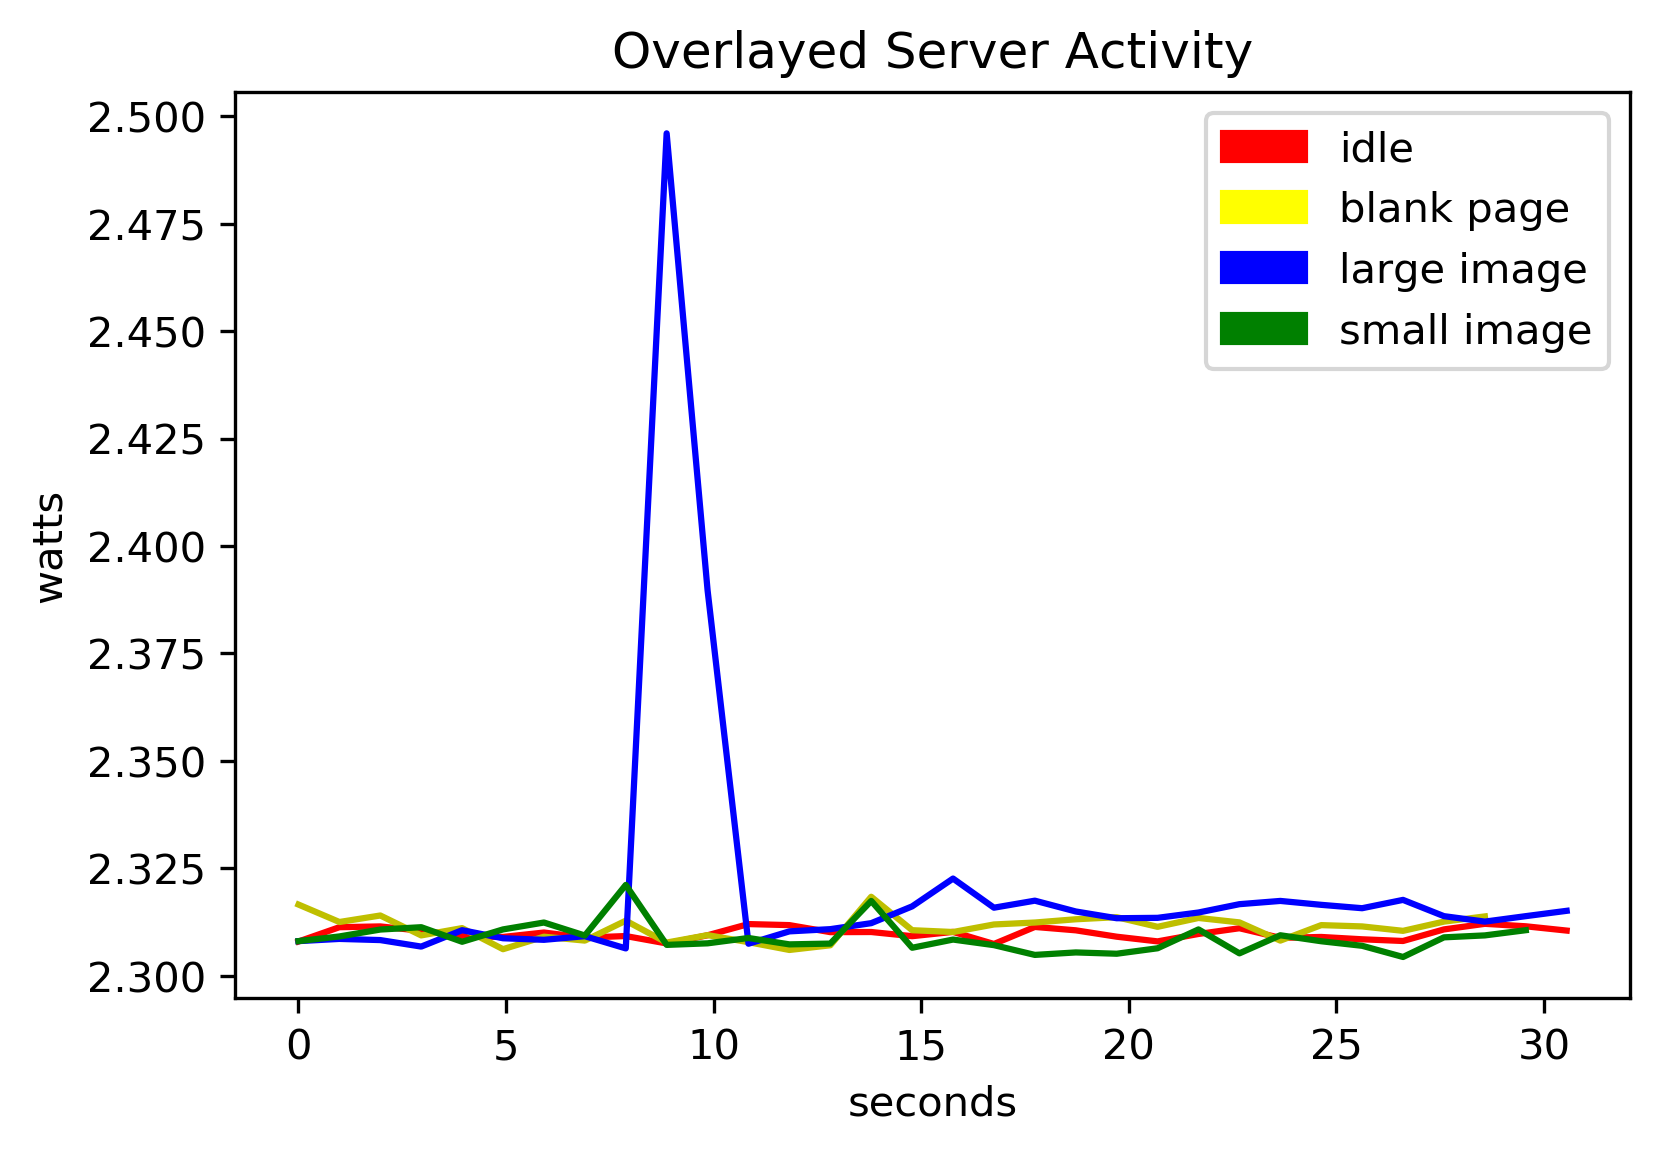

In [31]:
fig, ax = plt.subplots(dpi=300)
'''
x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

'''

colors = ['r','y','b','g']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%4])

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity')

redLabel = mpatches.Patch(color='red', label='idle')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='blank page')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel, blueLabel, greenLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()

In [32]:
#averages
averagedData = dataFrameSplits

In [33]:
averagedData[0].shape[0]

32

In [34]:
#find the shortest length of the data sets
dataLengths = []

for mins in list(range(len(overlayData))):
    dataLengths.append(averagedData[mins].shape[0])
minData = min(dataLengths)

minData

30

In [35]:
averagedData[2].watts.loc[averagedData[2].index[6]]

2.3083478666666664

In [36]:
newAveragedDataL = []
newAveragedDataS = []

#loop through all data points
for sumum in list(range(minData)):
    #add up that data point for each set
    summedUp = []
    for getVal in list(range(len(averagedData)/2)):
        summedUp.append(averagedData[getVal*2].watts.loc[averagedData[getVal*2].index[sumum]])
    newAveragedDataL.append(np.mean(summedUp))
    
    summedUp = []
    for getVal in list(range(len(averagedData)/2)):
        summedUp.append(averagedData[(getVal*2)+1].watts.loc[averagedData[(getVal*2)+1].index[sumum]])
    newAveragedDataS.append(np.mean(summedUp))
    
print(newAveragedDataL)
print(newAveragedDataS)
    

[2.3079998, 2.309921733333333, 2.3098763333333325, 2.308605133333333, 2.3099065999999997, 2.3088623999999998, 2.3091953333333333, 2.309028866666667, 2.3077879333333335, 2.4017659333333334, 2.3495407999999998, 2.3097250000000003, 2.3110416, 2.310481666666667, 2.311192933333333, 2.3126608666666666, 2.3163988, 2.311601533333333, 2.3144012, 2.3127516666666663, 2.3112231999999997, 2.3107238000000003, 2.312206866666667, 2.3138412666666666, 2.313099733333333, 2.3127516666666663, 2.3120857999999997, 2.3128576, 2.3123128, 2.312327933333333]
[2.3122976666666673, 2.3108146, 2.3123733333333334, 2.310330333333333, 2.3094828666666665, 2.3084689333333333, 2.3107238000000008, 2.308756466666667, 2.3169587333333332, 2.307439866666667, 2.3084840666666664, 2.3082873333333334, 2.3066378, 2.3072734, 2.317881866666667, 2.3085446, 2.309286133333334, 2.3095131333333336, 2.3086051333333337, 2.309271, 2.3093617999999996, 2.3088775333333333, 2.3121009333333333, 2.3088018666666663, 2.308786733333333, 2.30989146666

In [37]:
# make a new data frame


someAveragedData = {'large' : newAveragedDataL ,'small' : newAveragedDataS , 'time': averagedData[4].loc[:,'scaled']}

averagedDF = pd.DataFrame(someAveragedData)


#get subsection
averagedDF = averagedDF.loc[(averagedDF.loc[:,'time']>= 7)  & (averagedDF.loc[:,'time'] <= 25)]

print(np.mean(averagedDF.large))
print(np.mean(averagedDF.small))

# Declare a list that is to be converted into a column 

averagedDF = averagedDF.assign(largeAVG=np.mean(averagedDF.large))
averagedDF = averagedDF.assign(smallAVG=np.mean(averagedDF.small))


averagedDF

IndexError: list index out of range

IndexError: list index out of range

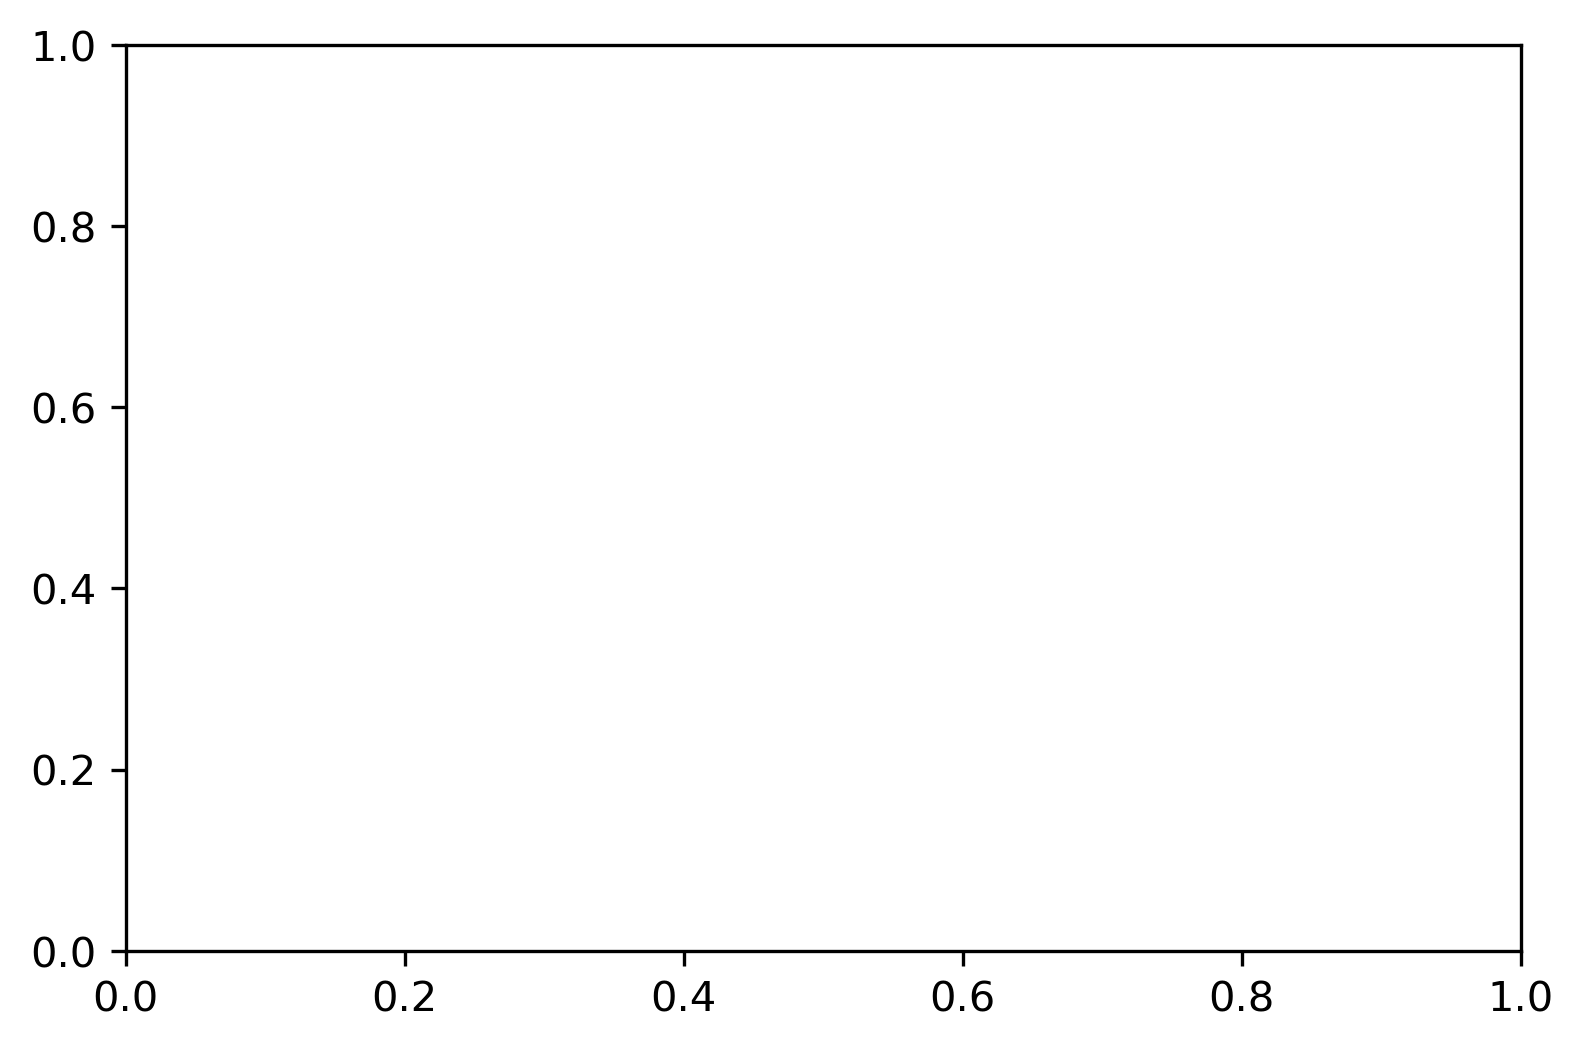

In [38]:
fig, ax = plt.subplots(dpi=300)


plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'smallAVG'], color='g')
plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'largeAVG'], color='g')

ax.set(xlabel='seconds', ylabel='watts',
       title='Averaged Server Activity')


blueLabel = mpatches.Patch(color='blue', label='avg large')
greenLabel = mpatches.Patch(color='g', label='avg peaks')
yellowLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[blueLabel, yellowLabel, greenLabel])

#ax.grid()
pngName3 = testDirectoryPath +"aggregator_averaged-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName3)
fig.savefig(pngName3)
plt.show()


C:/Users/Alex Nathanson/Documents/solarserver/aggregator/smallimageVSlargeimage_pingpongtest_August24/aggregator_overlay-2019-08-25-1566787014.png


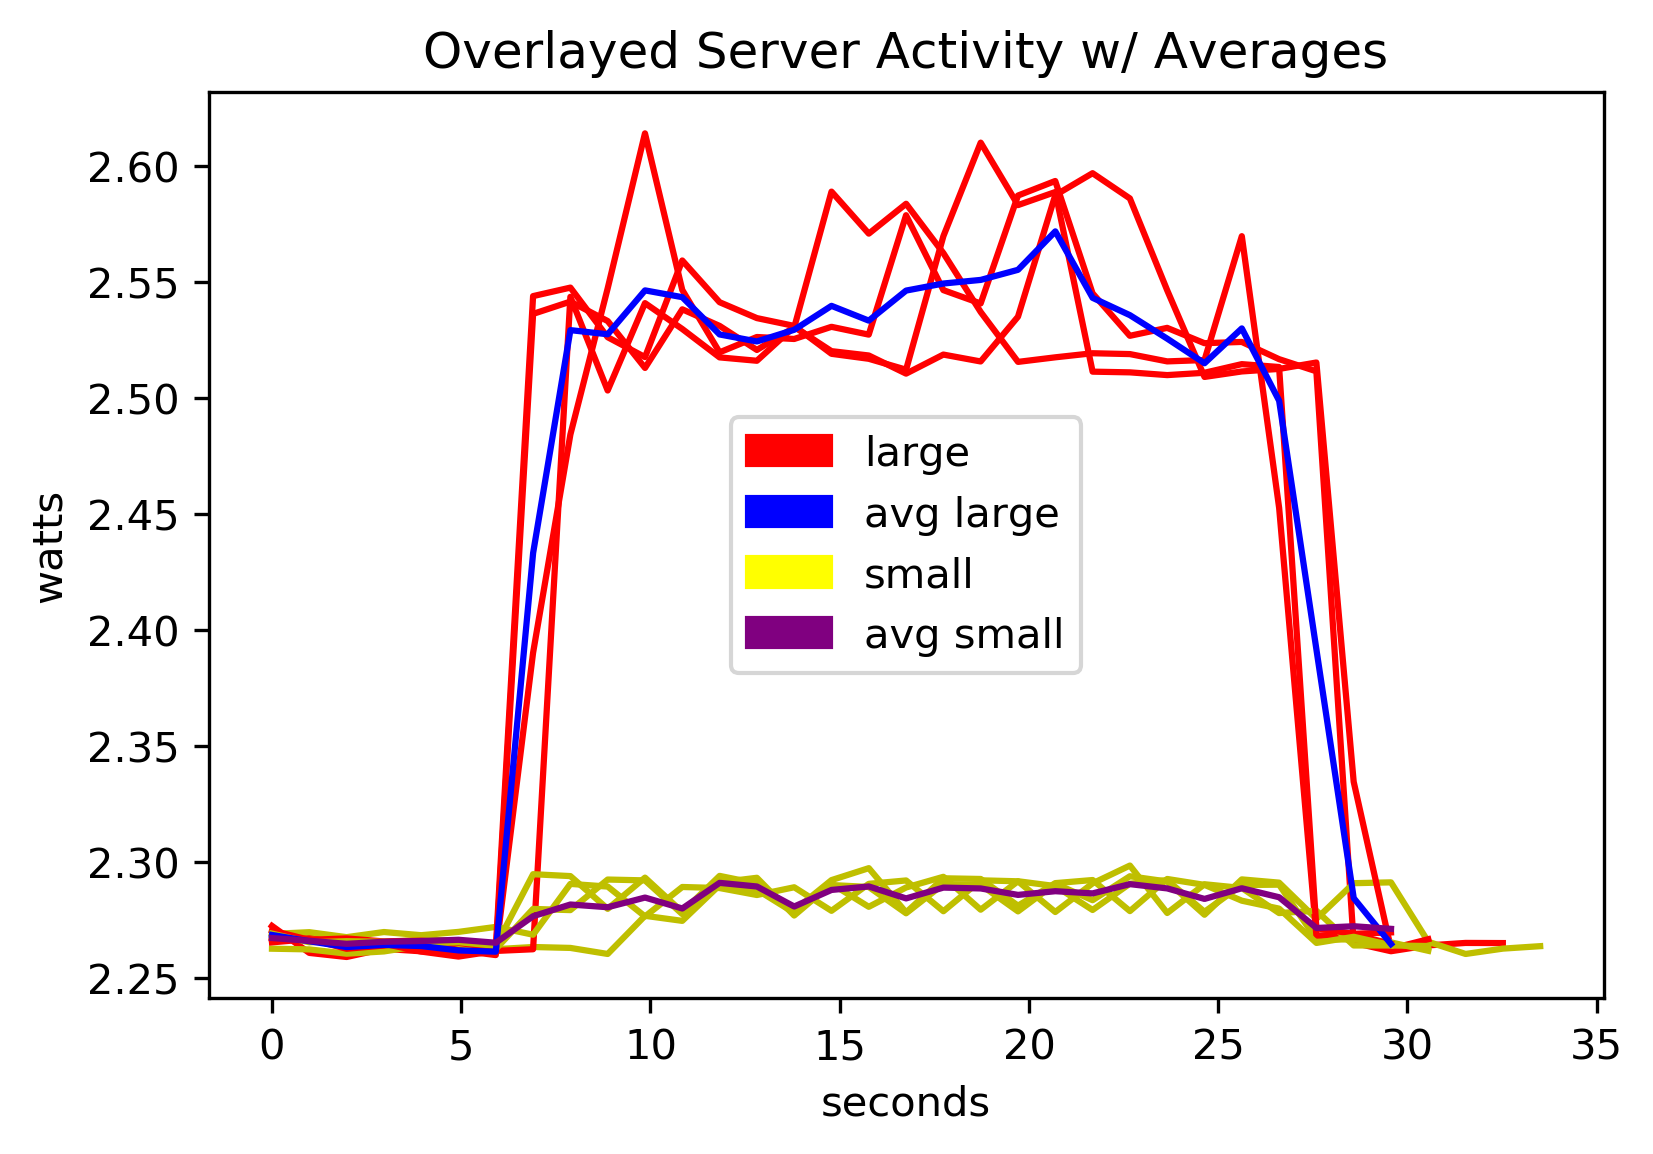

In [53]:
fig, ax = plt.subplots(dpi=300)

colors = ['r','y']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

    
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity w/ Averages')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
#ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='b', label='avg large')
yellowLabel = mpatches.Patch(color='yellow', label='small')
purpleLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[redLabel, blueLabel, yellowLabel, purpleLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()